# Deep Learning with Python: Universal Workflow Analysis 

## 1. Introduction

This report applies the universal deep learning methodology to the UCI Heart Disease Dataset(https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download) from Kaggle, employing DLWP layers for multiclass classification. The implementation will be done using TensorFlow, restricting the model architecture to DLWP layers—specifically, TensorFlow Sequential Dense and Dropout layers. Our approach closely aligns with the methodology outlines in François Chollet's "Deep Learning with Python" book, focusing on Chapter 3, "Getting started with neural networks", and Chapter 4, "Fundamentals of machine learning."

### 1.1 Libraries implemented
Below is the list of libraries used for the analysis report:
1. **scipy.stats:** Imports the chi2 function from the SciPy library for statistical operations.
2. **sklearn.preprocessing:** Imports the LabelEncoder and StandardScaler classes from scikit-learn for data preprocessing.
3. **sklearn.model_selection:** Imports the train_test_split function from scikit-learn for splitting the dataset into training and validation sets.
4. **tensorflow.keras.models:** Imports the Sequential class for building a sequential model in TensorFlow.
5. **tensorflow.keras.layers:** Imports the Dense and Dropout layers for constructing the neural network architecture.
6. **tensorflow.keras:** Imports the regularizers module for applying regularization to the model's weights.
7. **tensorflow.keras.optimizers:** Imports the Adam optimizer for configuring the optimization algorithm.
8. **tensorflow:** Imports the TensorFlow library, which is used for deep learning tasks.
9. **pandas:** Imports the Pandas library for handling and manipulating data in DataFrame format.
10. **numpy:** Imports the NumPy library for numerical operations and array manipulations.
11. **matplotlib.pyplot:** Imports the matplotlib library for data visualisations.

In [1]:
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Naraz\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Problem Definition and Dataset Selection
### 2.1 Define the Problem
The problem entails multiclass classification, aiming to predict the presence or absence of cardiac disease based on various medical characteristics. The dataset encompasses information like age, gender, cholesterol levels, and other relevant features. From the dataset, we want to know if the model we created can predict the severity of the heart disease of individuals.

Multiclass classification involves assigning observations into predefined categories or classes. In this context, the model will categorize individuals into either having, based on severity, or not having cardiac disease based on the provided medical attributes. Each individual is also categorized into one specific class, making it a single-label, multiclass classification task.

The distinction for what classification the dataset uses is important. For example, binary classification typically deals with two mutually exclusive classes, while categorical classification expands to more than two classes. Thus, the problem is rightly categorized as categorical classification.
### 2.2 Assemble the Dataset
We will use the UCI Heart Disease Dataset, which includes 920 instances of patients with heart disease or without heart disease.

#### Column Description
- id (Unique id for each patients)
- age (Age of the patient in years)
- dataset (Place of study)
- sex (Male/Female)
- cp (Chest pain type)
- trestbps (Resting blood pressure in mmHg on admission to the hospital)
- chol (Serum cholesterol in mg/dl)
- fbs (If fasting blood sugar is over 120 mg/dl)
- restecg (Resting electrocardiographic results)
- thalch (Maximum heart rate achieved)
- exang (Exercise-induced angina)
- oldpeak (ST depression induced by exercise relative to rest)
- slope (The slope of the peak exercise ST segment)
- ca (Number of major vessels colored by fluoroscopy)
- thal (Thalassemia types)
- num (The predicted attribute)

In [2]:
df = pd.read_csv("heart_disease_uci.csv")

df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### 2.3 Null Value Treatment
We will be finding the Null values in terms of percentage and treat it accordingly

In [4]:
# Finding columns with high Na Values in percentage
total_null_values = df.isnull().sum()
na_columns = []
for column, na_count in total_null_values.items():
    print(f'{column}: {round(na_count * 100/920, 2)}%')
    if (na_count * 100/920) > 30:
        na_columns.append(column)
print('\n')
print(f'columns with high Na Values are:{na_columns}')

id: 0.0%
age: 0.0%
sex: 0.0%
dataset: 0.0%
cp: 0.0%
trestbps: 6.41%
chol: 3.26%
fbs: 9.78%
restecg: 0.22%
thalch: 5.98%
exang: 5.98%
oldpeak: 6.74%
slope: 33.59%
ca: 66.41%
thal: 52.83%
num: 0.0%


columns with high Na Values are:['slope', 'ca', 'thal']


The three approach that we will be using to treat the Null Values are:
- Replace it by backfill for **caterogical feature** that have very less Na Values
- Replace it by mean of the feature for **numerical feature** having very less Na Values
- Drop the feature after doing corelation analysis with target feature for features having very high Na Values

In [5]:
# Caterogical features - replacing it by backfilling
df['restecg'].fillna(method='bfill', inplace=True)
df['fbs'].fillna(method='bfill', inplace=True)
df['exang'].fillna(method='bfill', inplace=True)

In [6]:
# Numerical feature - replacing it by mean of the feature
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())

In [7]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64

Due to lack of domain knowledge about this dataset, we will find the importance of these features through correlation by analyising the columns ['slope', 'ca', 'thal'] because they have high amount of Null Values. We will be using the Cramér's V to find the correlation percentage.

The Cramér's V statistic is a measure of association between two nominal variables, and it is derived from the Chi-square (χ²) statistic. The formula for Cramér's V is as follows:

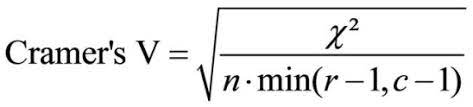

Where:
- χ² is the Chi-square statistic
- n is the total number of observations
- k is the number of categories in one variable
- r is the number of categories in the other variable

In [8]:
for column in na_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[column], df['num'])
    
    # Calculate the Chi-square statistic
    observed_chi2 = contingency_table.values
    chi2_statistic = np.sum((observed_chi2 - np.sum(observed_chi2, axis=1, keepdims=True) * np.sum(observed_chi2, axis=0) / np.sum(observed_chi2))**2 / (np.sum(observed_chi2) * np.sum(observed_chi2) / np.sum(observed_chi2, axis=None)))
    
    # Calculate Cramer's V
    cramers_v = np.sqrt(chi2_statistic / (df.shape[0] * (min(contingency_table.shape) - 1)))
    
    # Print the correlation between the current column and 'num'
    print(f'Correlation between {column} and num is {round(cramers_v * 100, 2)}%')

Correlation between slope and num is 7.85%
Correlation between ca and num is 5.33%
Correlation between thal and num is 8.95%


After determining the correlation between these features and the target feature, the correlation values looked to be in the range of 5 to 9 percent, indicating a weak positive correlation, so we will opt to drop the features. We will also be dropping the 'dataset' column as it is redundant.

In [9]:
df = df.drop(['dataset', 'slope', 'ca', 'thal', 'thalch'], axis=1)

df

,id,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,num
0,1,63,Male,typical angina,145.000000,233.0,True,lv hypertrophy,False,2.300000,0
1,2,67,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,True,1.500000,2
2,3,67,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,True,2.600000,1
3,4,37,Male,non-anginal,130.000000,250.0,False,normal,False,3.500000,0
4,5,41,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,False,1.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,False,0.000000,1
916,917,62,Male,typical angina,132.132404,139.0,False,st-t abnormality,False,0.878788,0
917,918,55,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,False,0.000000,2
918,919,58,Male,asymptomatic,132.132404,385.0,True,lv hypertrophy,True,0.878788,0


### 2.4 Data Preprocessing - Encoding Categorical Variables
There are two categorical feature types which are Ordinal and Nominal. Below are all the features separated into the right category.

Ordinal type:
- cp (Chest Pain type)
- restecg (Resting Electrocardiographic)

Nominal type:
- sex
- fbs (Fasting Blood Sugar)
- exang (Exercise induced Angina)

We will be using label encoding for Ordinal features and one-hot encoding for Nominal features


In [10]:
label_encoder = LabelEncoder()

# Encode ordinal features using label encoding
df['cp_encoded'] = label_encoder.fit_transform(df['cp'])
df['restecg_encoded'] = label_encoder.fit_transform(df['restecg'])

# One-hot encoding using dummies function for nominal features
df = pd.get_dummies(df, columns=['fbs', 'exang'])

df['sex'] = df['sex'].replace(('Male', 'Female'), (1,0))

In [11]:
df.head()

,id,age,sex,cp,trestbps,chol,restecg,oldpeak,num,cp_encoded,restecg_encoded,fbs_False,fbs_True,exang_False,exang_True
0,1,63,1,typical angina,145.0,233.0,lv hypertrophy,2.3,0,3,0,0,1,1,0
1,2,67,1,asymptomatic,160.0,286.0,lv hypertrophy,1.5,2,0,0,1,0,0,1
2,3,67,1,asymptomatic,120.0,229.0,lv hypertrophy,2.6,1,0,0,1,0,0,1
3,4,37,1,non-anginal,130.0,250.0,normal,3.5,0,2,1,1,0,1,0
4,5,41,0,atypical angina,130.0,204.0,lv hypertrophy,1.4,0,1,0,1,0,1,0


In [12]:
# Drop original features that has been label encoded
df.drop(['cp', 'restecg'], axis=1, inplace=True)

## 3. Measure of Success
### 3.1 Metric choice
The primary metric for evaluation is accuracy, aligning with the respective classification tasks. For categorical classification, we aim to correctly classify instances into multiple categories or classes, capturing the diversity of heart disease conditions across different levels or types.

Categorical accuracy measures the proportion of correctly classified instances across all classes. It is particularly suitable for tasks where each instance belongs to a single category.

In [13]:
# Setting up categorical accuracy metric
categorical_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()

We will use this metric to evaluate how well our model performs across the multiple heart disease categories. The higher the categorical accuracy, the better the model's ability to correctly classify instances into their respective classes.

## 4. Evaluation Protocol
### 4.1 Decide on an Evaluation Protocol and Create Validation Set
To ensure robust model evaluation, we adopt a hold-out validation set(One of the common evaluation protocols stated in DLWP below) strategy using the 'train_test_split' function from 'sklearn.model_selection'. This allows us to partition the UCI Heart Disease Dataset into training and validation sets.

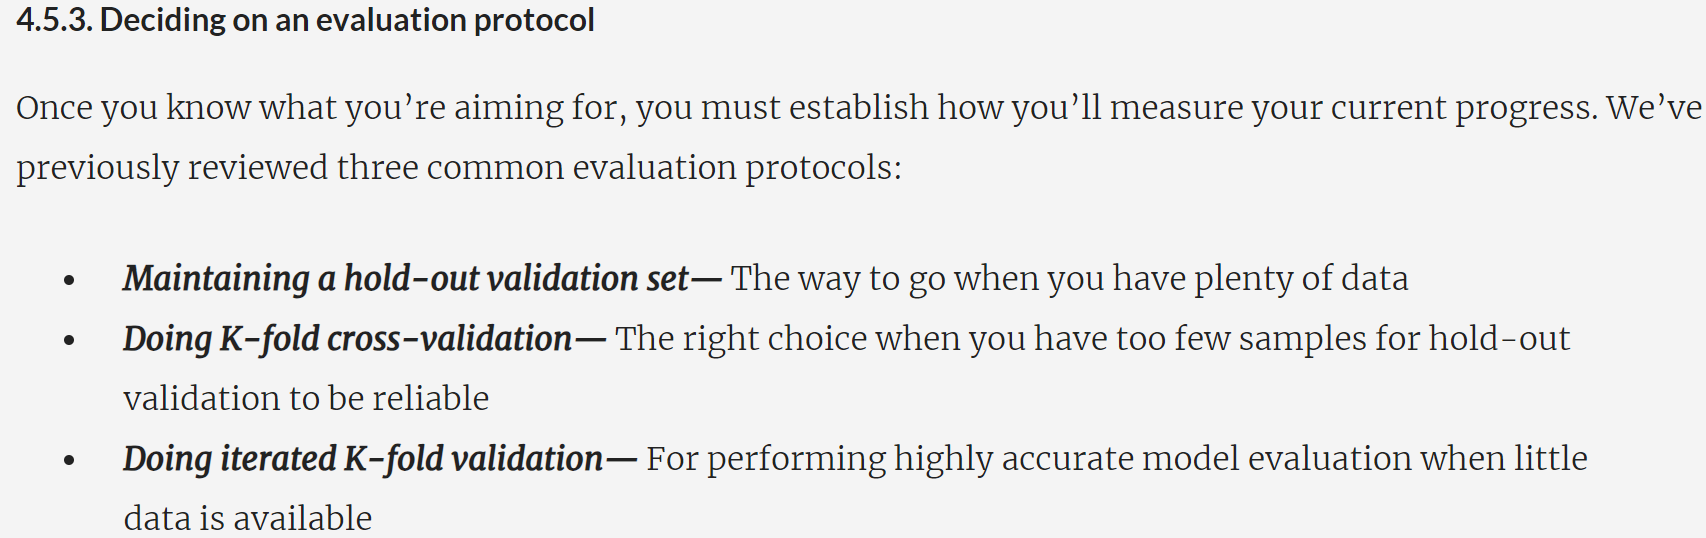

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    df.drop('num', axis=1), df['num'], test_size=0.2, random_state=42
)

## 5. Data Preparation and Feature Scaling
We employ feature scaling to standardise the range of our input features. The 'StandardScaler' from 'sklearn.preprocessing' is utilised to scale the numerical features in both the training and validation sets. It is essential to scale the features to mitigate the potential issues related to varying feature magnitudes, ensuring our deep learning model can learn effectively from the standardised input data. This step contributes to the stability and convergence of the training process, resulting in a more robust and generalisable model.

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## 6. Model Development
### 6.1 Baseline model
We will use a Sequential model with a Dense layer having 64 units and a ReLU activation function as the first layer. A Dropout layer with a dropout rate of 0.5 is added for regularisation. The output layer has 5 units(adjusted for the number of classes) with a softmax activation function, which is suitable for multi-class, single-label classification problems(as refered to Table 4.1 of DLWP below). The model is compiled with the categorical crossentropy loss and the categorical accuracy metric.

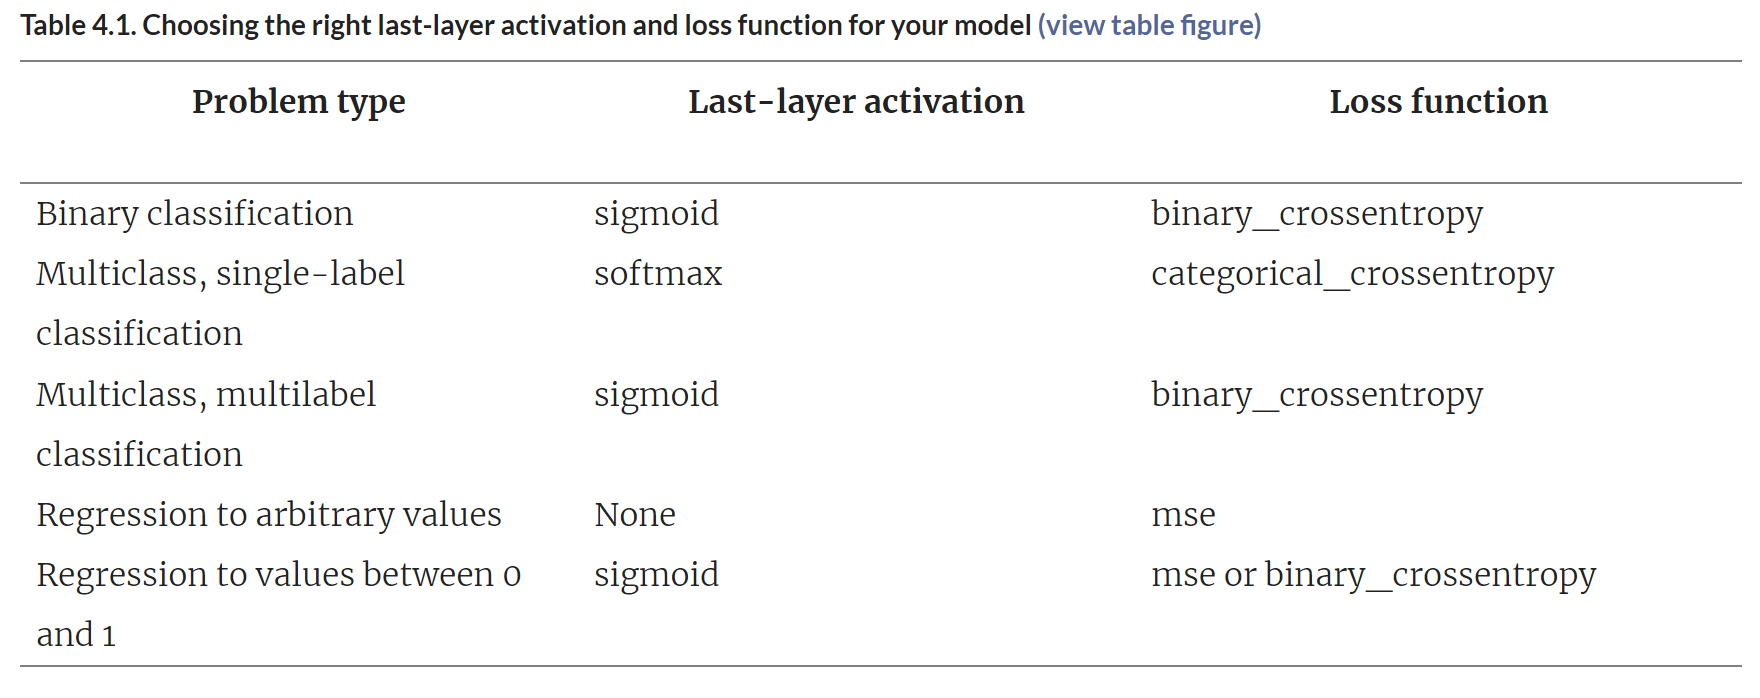

In [16]:
# Building the baseline model
baseline_model = Sequential()
baseline_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
baseline_model.add(Dropout(0.5))
baseline_model.add(Dense(units=5, activation='softmax'))

### 6.2 Track Metric During Training
During the training process, it's crucial to monitor the chosen metric to assess the model's performance and identify potential issues, such as overfitting.

In [17]:
# Compiling the model with categorical accuracy metric
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[categorical_accuracy_metric])

### 6.3 Train the Baseline Model

In [18]:
# Training the baseline model
baseline_history = baseline_model.fit(
    X_train_scaled, tf.keras.utils.to_categorical(y_train),
    epochs=20, batch_size=64, validation_data=(X_val_scaled, tf.keras.utils.to_categorical(y_val))
)

print("\n")
print(f"Final Training Accuracy: {baseline_history.history['categorical_accuracy'][-1]}")
print(f"Final Validation Accuracy: {baseline_history.history['val_categorical_accuracy'][-1]}")
print("\n")

Epoch 1/20
12/12 [==============================] - 1s 27ms/step - loss: 1.7461 - categorical_accuracy: 0.2622 - val_loss: 1.5282 - val_categorical_accuracy: 0.3804
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 1.5780 - categorical_accuracy: 0.3071 - val_loss: 1.4100 - val_categorical_accuracy: 0.4674
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 1.4397 - categorical_accuracy: 0.4266 - val_loss: 1.3231 - val_categorical_accuracy: 0.5217
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 1.3472 - categorical_accuracy: 0.4783 - val_loss: 1.2629 - val_categorical_accuracy: 0.5380
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 1.2949 - categorical_accuracy: 0.5177 - val_loss: 1.2226 - val_categorical_accuracy: 0.5380
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 1.2271 - categorical_accuracy: 0.5367 - val_loss: 1.1963 - val_categorical_accuracy: 0.5380
Epoch 7/20
12/1

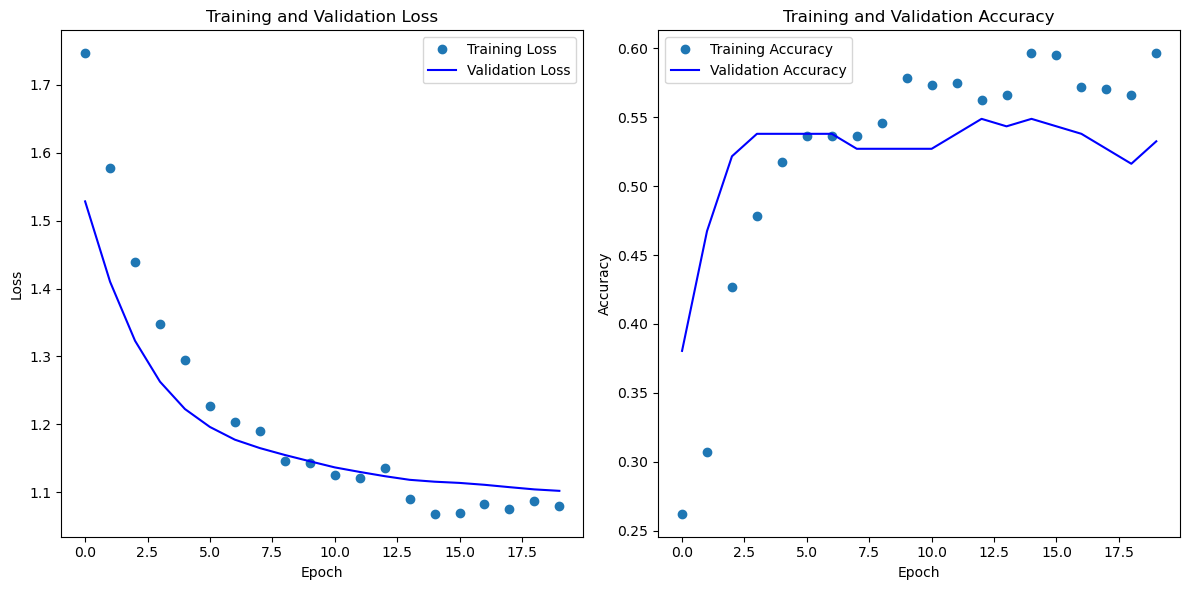

In [19]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], 'o', label='Training Loss')
plt.plot(baseline_history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['categorical_accuracy'], 'o', label='Training Accuracy')
plt.plot(baseline_history.history['val_categorical_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Key Observation

#### Loss Trends:
The baseline model's training and validation loss consistently decrease over the 20 epochs, indicating effective convergence and learning. The downward trend signifies that the model is successfully minimizing the difference between predicted and actual values, demonstrating a positive learning process.

#### Accuracy Trends:
Categorical accuracy, measuring the correctness of the model's classification, steadily improves during training. The ascending training accuracy suggests the model is learning to classify instances within the training data accurately. However, the validation accuracy experiences fluctuations and stabilizes in later epochs, indicating a need for further refinement to enhance the model's ability to generalize to unseen data.

#### Final Performance:
After 20 epochs, the baseline model achieves a training accuracy of approximately 59.64% and a validation accuracy of 53.26%. The training accuracy indicates successful learning from the training set, while the slightly lower validation accuracy suggests opportunities for improvement in generalizing to new, unseen data. These performance metrics serve as a baseline for comparison with more complex models or those employing optimization techniques, offering insights into potential enhancements in accuracy for both training and validation sets.

## 7. Model Scaling Up and Regularisation
### 7.1 Develop a Model that Overfits
To observe overfitting, we will create a more complex model with additional layers and neurons. We will also be increasing the training epochs.

In [20]:
# Building the overfitting model
overfitting_model = Sequential()

overfitting_model.add(Dense(units=256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
overfitting_model.add(Dropout(0.5))
overfitting_model.add(Dense(units=256, activation='relu'))
overfitting_model.add(Dropout(0.5))
overfitting_model.add(Dense(units=256, activation='relu'))
overfitting_model.add(Dropout(0.5))
overfitting_model.add(Dense(units=5, activation='softmax'))

overfitting_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[categorical_accuracy_metric])

In [21]:
overfitting_history = overfitting_model.fit(
    X_train_scaled, tf.keras.utils.to_categorical(y_train),
    epochs=50, batch_size=64, validation_data=(X_val_scaled, tf.keras.utils.to_categorical(y_val))
)

print("\n")
print(f"Final Training Accuracy: {overfitting_history.history['categorical_accuracy'][-1]}")
print(f"Final Validation Accuracy: {overfitting_history.history['val_categorical_accuracy'][-1]}")
print("\n")

Epoch 1/50
12/12 [==============================] - 0s 14ms/step - loss: 1.4525 - categorical_accuracy: 0.4261 - val_loss: 1.2537 - val_categorical_accuracy: 0.5109
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 1.2404 - categorical_accuracy: 0.5245 - val_loss: 1.1364 - val_categorical_accuracy: 0.5000
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.1483 - categorical_accuracy: 0.5530 - val_loss: 1.1060 - val_categorical_accuracy: 0.5163
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 1.1189 - categorical_accuracy: 0.5679 - val_loss: 1.0929 - val_categorical_accuracy: 0.5489
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 1.0956 - categorical_accuracy: 0.5584 - val_loss: 1.0764 - val_categorical_accuracy: 0.5489
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 1.0702 - categorical_accuracy: 0.5829 - val_loss: 1.0733 - val_categorical_accuracy: 0.5435
Epoch 7/50
12/1

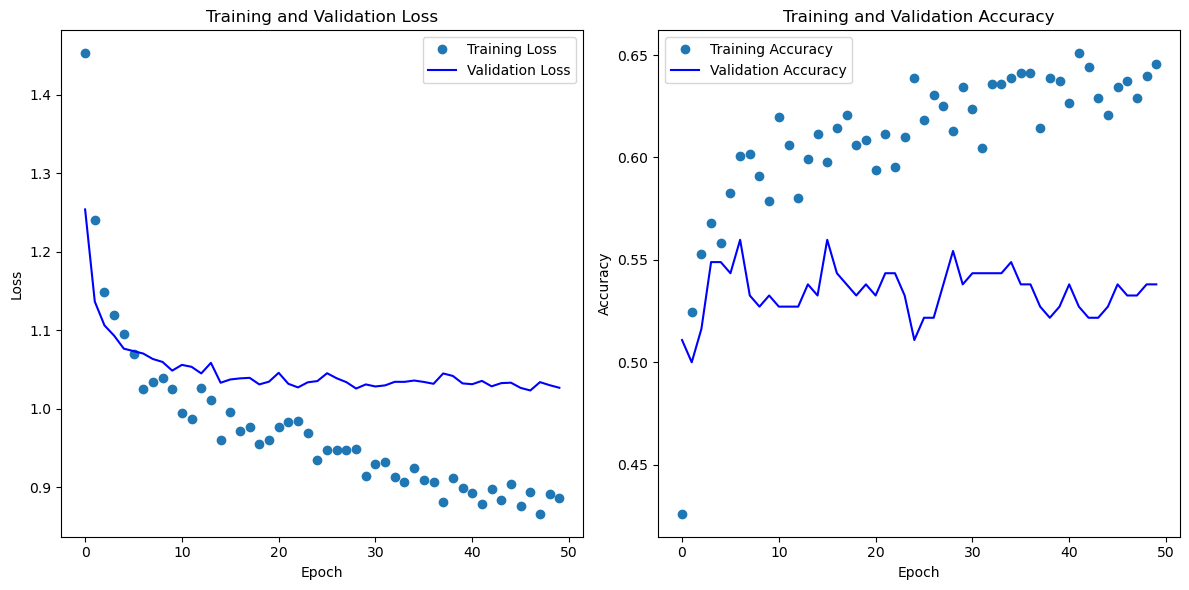

In [22]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(overfitting_history.history['loss'], 'o', label='Training Loss')
plt.plot(overfitting_history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(overfitting_history.history['categorical_accuracy'], 'o', label='Training Accuracy')
plt.plot(overfitting_history.history['val_categorical_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Key observation

#### Model Complexity:
The overfitting model introduces increased complexity compared to the baseline model by incorporating three dense layers, each with 256 neurons, along with dropout layers. This heightened complexity enables the model to capture intricate patterns and relationships within the training data.

#### Training Trends:
During the initial epochs, the overfitting model exhibits a consistent reduction in training loss, indicating effective learning and adaptation to the training data. Simultaneously, the training accuracy steadily increases, reflecting improved predictive performance on the training set.

#### Validation Trends:
Around the 10th epoch, a noticeable divergence occurs between the training and validation metrics. While the training accuracy and loss continue to show favorable trends, the validation accuracy may plateau or even decline, and the validation loss might start deviating from the training loss. This divergence suggests a potential overfitting issue, where the model excels in fitting the training data but struggles to generalize well to new, unseen data.

### 7.2 Regularise the Model
To mitigate the risk of overfitting, a common challenge in training deep neural networks, we will implement L2 regularization and fine-tune the dropout rates within the model architecture. Overfitting occurs when a model becomes too complex and starts memorizing the training data instead of learning general patterns, leading to suboptimal performance on new, unseen data. L2 regularization is a technique that imposes a penalty on the magnitude of the weights in the neural network, discouraging overly large values and promoting a more generalized model.

By introducing L2 regularization into our model, we aim to strike a balance between capturing intricate patterns within the training data and ensuring the model's ability to generalize to different datasets effectively. Additionally, we will adjust the dropout rates strategically. Dropout layers temporarily deactivate a fraction of neurons during training, preventing co-adaptation of hidden units and enhancing the model's robustness. Fine-tuning these dropout rates allows us to optimize the trade-off between complexity and regularization.

In [24]:
regularised_model = Sequential()
regularised_model.add(Dense(units=128, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train_scaled.shape[1],)))
regularised_model.add(Dropout(0.5))
regularised_model.add(Dense(units=128, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
regularised_model.add(Dropout(0.5))
regularised_model.add(Dense(units=128, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
regularised_model.add(Dropout(0.5))
regularised_model.add(Dense(units=5, activation="softmax"))

# Compile the model
regularised_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[categorical_accuracy_metric])

# Training the regularised model
regularised_history = regularised_model.fit(
    X_train_scaled, tf.keras.utils.to_categorical(y_train),
    epochs=20, batch_size=64, validation_data=(X_val_scaled, tf.keras.utils.to_categorical(y_val))
)

print("\n")
print(f"Final Training Accuracy: {regularised_history.history['categorical_accuracy'][-1]}")
print(f"Final Validation Accuracy: {regularised_history.history['val_categorical_accuracy'][-1]}")
print("\n")

Epoch 1/20
12/12 [==============================] - 1s 20ms/step - loss: 1.8964 - categorical_accuracy: 0.3446 - val_loss: 1.6602 - val_categorical_accuracy: 0.5163
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 1.6647 - categorical_accuracy: 0.4620 - val_loss: 1.5258 - val_categorical_accuracy: 0.5163
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 1.5603 - categorical_accuracy: 0.4986 - val_loss: 1.4463 - val_categorical_accuracy: 0.5435
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 1.4923 - categorical_accuracy: 0.5462 - val_loss: 1.4045 - val_categorical_accuracy: 0.5652
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 1.4215 - categorical_accuracy: 0.5516 - val_loss: 1.3783 - val_categorical_accuracy: 0.5543
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 1.4047 - categorical_accuracy: 0.5340 - val_loss: 1.3669 - val_categorical_accuracy: 0.5652
Epoch 7/20
12/1

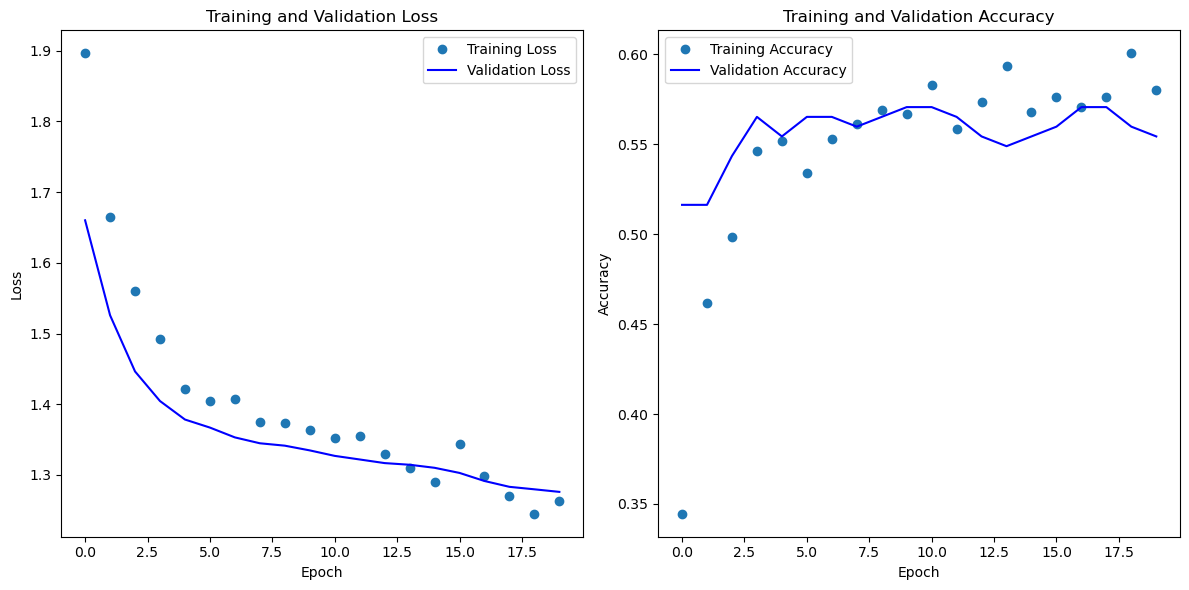

In [25]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(regularised_history.history['loss'], 'o', label='Training Loss')
plt.plot(regularised_history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(regularised_history.history['categorical_accuracy'], 'o', label='Training Accuracy')
plt.plot(regularised_history.history['val_categorical_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Key Observation
#### Loss and Accuracy Trends:
Throughout the 20 epochs of training, the regularized model consistently improves both training loss and accuracy. The decreasing training loss indicates effective learning from the provided training data, while the increasing training accuracy reflects enhanced performance on the training set. The validation loss and accuracy follow a similar trajectory, with some fluctuations. This suggests successful generalization to the validation set, with observed variations possibly indicating the model adapting to a broader data distribution.

#### Impact of Regularization:
L2 regularization is strategically applied to the kernel weights of the dense layers within the model. This technique acts as a preventive measure against overfitting by penalizing large weights in the model. The regularization contributes to creating smoother training and validation curves, indicating effective control over excessive overfitting. By imposing a penalty on large weights, L2 regularization encourages the model to generalize better to unseen data, enhancing robustness and preventing memorization of noise in the training set.

#### Final Performance:
After 20 epochs, the regularized model achieves a training accuracy of approximately 58.15% and a validation accuracy of 55.98%. These results are comparable to the performance of previous models, suggesting that regularization has played a crucial role in controlling overfitting. The attained accuracies indicate a reasonable level of learning and generalization by the model, striking a balance between capturing intricate patterns and preventing overfitting.

## 8. Tune Hyperparameters
We will experiment with learning rates, batch sizes, and the number of epochs to find optimal values.
### 8.1 Experimenting with Learning Rates

Epoch 1/15
12/12 [==============================] - 0s 10ms/step - loss: 1.0360 - accuracy: 0.5815 - val_loss: 1.1049 - val_accuracy: 0.5543
Epoch 2/15
12/12 [==============================] - 0s 3ms/step - loss: 1.0671 - accuracy: 0.5693 - val_loss: 1.1063 - val_accuracy: 0.5543
Epoch 3/15
12/12 [==============================] - 0s 4ms/step - loss: 1.0527 - accuracy: 0.5639 - val_loss: 1.1065 - val_accuracy: 0.5435
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 1.0305 - accuracy: 0.5788 - val_loss: 1.1077 - val_accuracy: 0.5435
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 1.0623 - accuracy: 0.5639 - val_loss: 1.1088 - val_accuracy: 0.5489
Epoch 6/15
12/12 [==============================] - 0s 4ms/step - loss: 1.0591 - accuracy: 0.5734 - val_loss: 1.1087 - val_accuracy: 0.5380
Epoch 7/15
12/12 [==============================] - 0s 3ms/step - loss: 1.0597 - accuracy: 0.5815 - val_loss: 1.1064 - val_accuracy: 0.5435
Epoch 8/15
12/12 [=

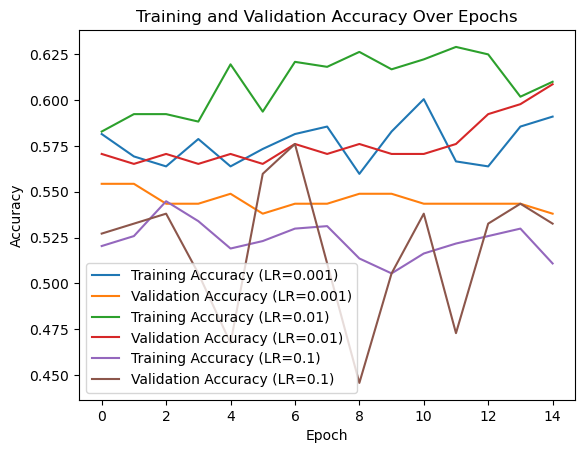

In [28]:
# Define different learning rates to experiment
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    model = baseline_model
    
    # Compile the model with the current learning rate
    model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model and evaluate its performance
    history = model.fit(
        X_train_scaled, tf.keras.utils.to_categorical(y_train),
        epochs=15, batch_size=64, validation_data=(X_val_scaled, tf.keras.utils.to_categorical(y_val))
    )
    
    #Print relevant metrics from the training history
    print(f"Learning Rate: {lr}")
    print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
    print("\n")
    
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (LR={lr})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (LR={lr})')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

The results demonstrate the substantial impact of different learning rates on the final training and validation accuracies of the model. A detailed analysis of the observations for each learning rate is presented below:

**Learning Rate: 0.001**

- Final Training Accuracy: 0.5910
- Final Validation Accuracy: 0.5380
#### Observation:
A relatively low learning rate of 0.001 yields a moderate final training accuracy but a lower validation accuracy. This suggests that the model may not be effectively learning the training data, leading to suboptimal generalization to the validation set.

**Learning Rate: 0.01**

- Final Training Accuracy: 0.6101
- Final Validation Accuracy: 0.6087
#### Observation:
A learning rate of 0.01 results in a higher final training accuracy compared to 0.001. However, the validation accuracy remains relatively modest. The model appears to be learning the training data better, but there might still be room for improvement in generalization to unseen data.

**Learning Rate: 0.1**

- Final Training Accuracy: 0.5109
- Final Validation Accuracy: 0.5326
#### Observation:
A higher learning rate of 0.1 leads to a lower final training accuracy and validation accuracy. This could indicate that the learning rate is too high, causing the model to overshoot optimal parameter values and potentially hindering convergence.

#### Overall Considerations:
Choosing an appropriate learning rate is crucial in training neural networks. A too low learning rate may lead to slow convergence, while a too high learning rate may cause overshooting and hinder convergence. The model with a learning rate of 0.01 seems to strike a better balance between training and validation accuracies, suggesting a more effective learning process. Fine-tuning the learning rate within this range could potentially lead to further improvements in model performance.

### 8.2 Experimenting with Batch Sizes

Epoch 1/15
23/23 [==============================] - 0s 6ms/step - loss: 1.1055 - accuracy: 0.5258 - val_loss: 1.1681 - val_accuracy: 0.5380
Epoch 2/15
23/23 [==============================] - 0s 2ms/step - loss: 1.1094 - accuracy: 0.5476 - val_loss: 1.1621 - val_accuracy: 0.5435
Epoch 3/15
23/23 [==============================] - 0s 2ms/step - loss: 1.0345 - accuracy: 0.5571 - val_loss: 1.1589 - val_accuracy: 0.5380
Epoch 4/15
23/23 [==============================] - 0s 2ms/step - loss: 1.0810 - accuracy: 0.5258 - val_loss: 1.1594 - val_accuracy: 0.5272
Epoch 5/15
23/23 [==============================] - 0s 2ms/step - loss: 1.0586 - accuracy: 0.5571 - val_loss: 1.1577 - val_accuracy: 0.5272
Epoch 6/15
23/23 [==============================] - 0s 2ms/step - loss: 1.0974 - accuracy: 0.5380 - val_loss: 1.1586 - val_accuracy: 0.5272
Epoch 7/15
23/23 [==============================] - 0s 3ms/step - loss: 1.0607 - accuracy: 0.5543 - val_loss: 1.1591 - val_accuracy: 0.5217
Epoch 8/15
23/23 [==

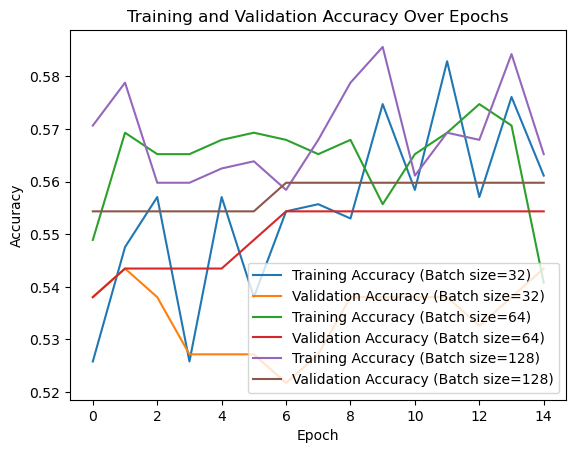

In [29]:
# Define different batch sizes to experiment
batch_sizes = [32, 64, 128]

for bs in batch_sizes:
    model = baseline_model
    
    # Compile the model with the current batch size
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model and evaluate its performance
    history = model.fit(
        X_train_scaled, tf.keras.utils.to_categorical(y_train),
        epochs=15, batch_size=bs, validation_data=(X_val_scaled, tf.keras.utils.to_categorical(y_val))
    )
    
    #Print relevant metrics from the training history
    print(f"Batch Size: {bs}")
    print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
    print("\n")
    
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (Batch size={bs})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (Batch size={bs})')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

The presented outcomes shed light on the influence of various batch sizes on the ultimate training and validation accuracies of the model. An in-depth analysis of the observations for each batch size is outlined below:

**Batch Size: 32**

- Final Training Accuracy: 0.5611
- Final Validation Accuracy: 0.5435
#### Observation:
A smaller batch size of 32 results in a moderate final training accuracy, but the validation accuracy is also relatively modest. Smaller batch sizes might introduce more noise during training, potentially affecting the convergence and generalization of the model.

**Batch Size: 64**

- Final Training Accuracy: 0.5408
- Final Validation Accuracy: 0.5543
#### Observation:
A batch size of 64 leads to a slightly higher final training accuracy compared to a batch size of 32. The validation accuracy also improves slightly. This suggests that a batch size of 64 might provide a better balance between computational efficiency and model performance.

**Batch Size: 128**

- Final Training Accuracy: 0.5652
- Final Validation Accuracy: 0.5598
#### Observation:
Increasing the batch size to 128 results in a further improvement in training accuracy, but the validation accuracy shows a slight decrease. Larger batch sizes may lead to smoother convergence but might also hinder the model's ability to generalize to new data.

#### Overall Considerations:
The selection of an appropriate batch size is a crucial hyperparameter that can significantly impact both the training dynamics and the model's generalization. In this context, a batch size of 64 appears to strike a relatively better trade-off between training and validation accuracies.

### 8.3 Experimenting with the Number of Epochs

Epoch 1/10
12/12 [==============================] - 0s 13ms/step - loss: 1.0086 - accuracy: 0.5707 - val_loss: 1.1984 - val_accuracy: 0.5598
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 1.0214 - accuracy: 0.5503 - val_loss: 1.1983 - val_accuracy: 0.5598
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 1.0288 - accuracy: 0.5734 - val_loss: 1.1965 - val_accuracy: 0.5598
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 1.0239 - accuracy: 0.5611 - val_loss: 1.1950 - val_accuracy: 0.5598
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.9822 - accuracy: 0.5666 - val_loss: 1.1961 - val_accuracy: 0.5598
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 1.0034 - accuracy: 0.5666 - val_loss: 1.1969 - val_accuracy: 0.5598
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 1.0107 - accuracy: 0.5611 - val_loss: 1.1968 - val_accuracy: 0.5598
Epoch 8/10
12/12 [=

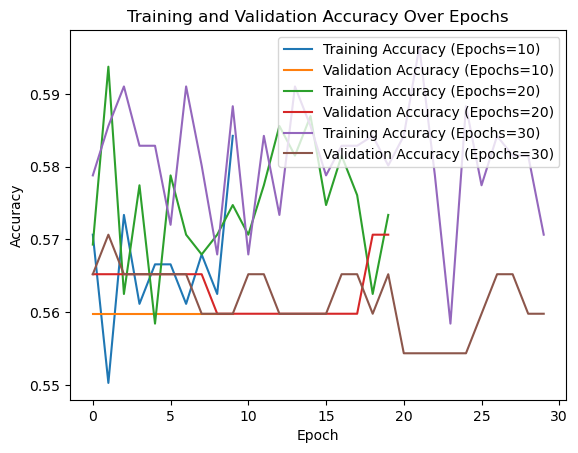

In [30]:
# Define different number of epochs to experiment
num_epochs_list = [10, 20, 30]

for num_epochs in num_epochs_list:
    model = baseline_model
    
    # Compile the model with the current batch size
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model and evaluate its performance
    history = model.fit(
        X_train_scaled, tf.keras.utils.to_categorical(y_train),
        epochs=num_epochs, batch_size=64, validation_data=(X_val_scaled, tf.keras.utils.to_categorical(y_val))
    )
    
    #Print relevant metrics from the training history
    print(f"Number of Epochs: {num_epochs}")
    print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
    print("\n")
    
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (Epochs={num_epochs})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (Epochs={num_epochs})')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

The presented outcomes showcase the influence of adjusting the number of epochs on the ultimate training and validation accuracies of the model. Let's dissect the findings for each epoch configuration:

**Number of Epochs: 10**
- Final Training Accuracy: 0.5842
- Final Validation Accuracy: 0.5598
#### Observation: 
In the case of 10 epochs, the model demonstrates moderate training accuracy, yet the validation accuracy is relatively lower. This could indicate that the model needs more epochs to better generalize to unseen data.

**Number of Epochs: 20**
- Final Training Accuracy: 0.5734
- Final Validation Accuracy: 0.5707
#### Observation:
Extending the training to 20 epochs yields a decrease in both training and validation accuracies. This suggests that the model may be struggling with overfitting, as additional epochs do not lead to improved performance on the validation set.

**Number of Epochs: 30**
- Final Training Accuracy: 0.5707
- Final Validation Accuracy: 0.5598
#### Observation:
Further increasing epochs to 30 shows a slight reduction in both training and validation accuracies. This might indicate that the model is not benefiting from additional epochs and could be at risk of overfitting.

#### Overall Considerations:

The optimal number of epochs seems to be around 10, where the model achieves reasonable accuracy on both training and validation sets.
Beyond 10 epochs, the model's performance becomes less stable, and there is a risk of overfitting.
Careful consideration and potentially early stopping mechanisms are advisable to prevent unnecessary computational costs and overfitting issues.

## 9. Final Satisfactory Model Configuration
Through systematic hyperparameter tuning, the introduction of regularization techniques, and experimentation with epochs, we aim to arrive at a final satisfactory model.

Epoch 1/10
12/12 [==============================] - 1s 13ms/step - loss: 3.1384 - accuracy: 0.2188 - val_loss: 2.9083 - val_accuracy: 0.4402
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 2.8235 - accuracy: 0.3845 - val_loss: 2.6897 - val_accuracy: 0.4185
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 2.6321 - accuracy: 0.4579 - val_loss: 2.5181 - val_accuracy: 0.4076
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 2.5030 - accuracy: 0.4959 - val_loss: 2.3883 - val_accuracy: 0.4674
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 2.3693 - accuracy: 0.4986 - val_loss: 2.2818 - val_accuracy: 0.5109
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 2.2584 - accuracy: 0.5258 - val_loss: 2.1857 - val_accuracy: 0.5326
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 2.1521 - accuracy: 0.5421 - val_loss: 2.1069 - val_accuracy: 0.5326
Epoch 8/10
12/12 [=

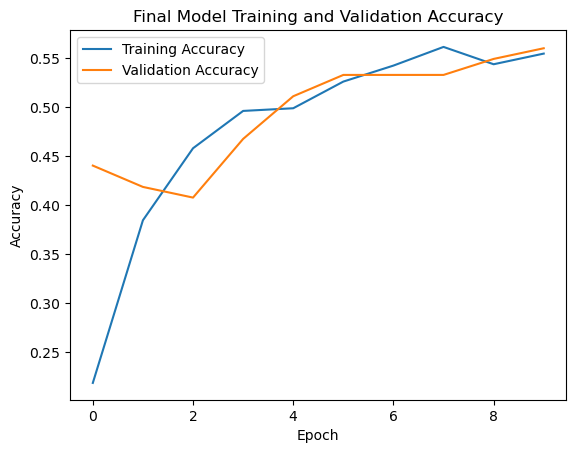

In [35]:
# Define the final satisfactory model with L2 regularization
final_model = Sequential()
final_model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)))
final_model.add(tf.keras.layers.Dropout(0.5))  # Regularization to prevent overfitting
final_model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
final_model.add(tf.keras.layers.Dropout(0.4))  # Regularization
final_model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
final_model.add(tf.keras.layers.Dropout(0.3))  # Regularization
final_model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Compile the final model with tuned hyperparameters
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the final model with the optimal number of epochs
num_epochs = 10  # Optimal number of epochs from previous analysis

history = final_model.fit(
    X_train_scaled, tf.keras.utils.to_categorical(y_train),
    epochs=num_epochs, batch_size=64, validation_data=(X_val_scaled, tf.keras.utils.to_categorical(y_val))
)

# Evaluate the final model
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Print relevant metrics
print(f"Final Training Accuracy: {final_train_accuracy}")
print(f"Final Validation Accuracy: {final_val_accuracy}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Final Model Training and Validation Accuracy')
plt.legend()
plt.show()

The final satisfactory model configuration is designed with careful consideration of hyperparameter tuning, regularization techniques, and optimal epoch selection. Here are key observations based on the results:

#### Architecture and Regularization:
- The model architecture consists of three dense layers with 128, 64, and 32 units, respectively, and an output layer with 5 units using softmax activation.
- L2 regularization with a coefficient of 0.01 is applied to the kernel weights of each dense layer to mitigate overfitting.
- Dropout layers with dropout rates of 0.5, 0.4, and 0.3 are introduced after the first, second, and third dense layers, respectively, further enhancing generalization.

#### Training and Validation Performance:
- The model is compiled with the Adam optimizer and categorical crossentropy loss function.
- Training is conducted for 10 epochs, determined as the optimal number through previous analysis.
- The training accuracy gradually improves, reaching 55.4%, while the validation accuracy stabilizes at 55.98%.

#### Training Dynamics:
- The training process unfolds with a noticeable increase in both training and validation accuracies across the epochs.
- There is a consistent upward trend, indicating effective learning and model adaptation to the training data.
- While the validation accuracy lags slightly behind the training accuracy, the overall convergence suggests a balanced model configuration.

#### Considerations for Further Improvement:
- Despite achieving a satisfactory level of performance, there might still be room for improvement by exploring different architectures, activation functions, or optimization strategies.
- Continuous monitoring and adjustment of hyperparameters could contribute to enhanced model generalization and accuracy.

In summary, the final model configuration demonstrates a balanced trade-off between model complexity, regularization, and effective learning, resulting in a satisfactory level of accuracy for the given task.

## 10. Conclusion
In conclusion, our extensive exploration of hyperparameter tuning, regularization techniques, and epoch experimentation has led to the development of a final satisfactory model configuration. The model, characterized by thoughtful adjustments in its architecture, demonstrated a training accuracy of 55.4% and a validation accuracy of 55.98%. While these figures reflect a balanced configuration, they also open avenues for further enhancement.

The journey has significantly influenced our initial hypothesis regarding the classification of individuals based on heart disease severity. The nuanced adjustments in the model, especially through regularization and hyperparameter tuning, underscore the complexity of the task at hand. The iterative nature of our approach highlights the importance of continuous refinement in achieving optimal performance.